In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/Shareddrives/Media Framing/datasets/1_dataset_ckipcut.csv", encoding = "utf-8")
df["ckip_cut"][56]


"['染疫', '死亡', '人數', '308', '人', ' ', '蘇貞昌', '.', '陳時中', '道歉']"

In [2]:
words = ['民調', '75%', '網', '不滿', '柯防疫', '表現', ' ', '柯文哲', '：', '人', '在', '做', '天', '在', '看']
print(words)
type(words) # 為什麼是str不是list?

['民調', '75%', '網', '不滿', '柯防疫', '表現', ' ', '柯文哲', '：', '人', '在', '做', '天', '在', '看']


list

In [3]:
# import re
# type(words.strip("[]").strip("'"))

# 文字計數 [2-3]()
製作與文字相應的排序表

In [4]:
word_to_id = {}
id_to_word = {}

for word in words:
    # print(word)
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(id_to_word)
word_to_id

{0: '民調', 1: '75%', 2: '網', 3: '不滿', 4: '柯防疫', 5: '表現', 6: ' ', 7: '柯文哲', 8: '：', 9: '人', 10: '在', 11: '做', 12: '天', 13: '看'}


{' ': 6,
 '75%': 1,
 '不滿': 3,
 '人': 9,
 '做': 11,
 '在': 10,
 '天': 12,
 '柯文哲': 7,
 '柯防疫': 4,
 '民調': 0,
 '看': 13,
 '網': 2,
 '表現': 5,
 '：': 8}

In [5]:
import numpy as np

corpus = [word_to_id[w] for w in words] # 列表解析式
corpus = np.array(corpus)
corpus

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 10, 13])

## 把文字計數寫成def

In [6]:
def preprocess(words):
    # 中文斷詞的話，可以把ckip or jieba的功能寫在這邊，並能連接下面變數就可以使用了
    word_to_id = {}
    id_to_word = {}

    for word in words:
        # print(word)
        if word not in word_to_id:
            new_id = len(word_to_id) # 利用word_to_id長度給予new_id編號
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = [word_to_id[w] for w in words] # 列表解析式
    corpus = np.array(corpus)
    
    return corpus, word_to_id, id_to_word # 這些可以在外面被呼叫

In [7]:
# 試用
words = ['染疫', '死亡', '人數', '308', '人', ' ', '蘇貞昌', '.', '陳時中', '道歉']
corpus, word_to_id, id_to_word = preprocess(words)
print(corpus)
print(word_to_id)
id_to_word


[0 1 2 3 4 5 6 7 8 9]
{'染疫': 0, '死亡': 1, '人數': 2, '308': 3, '人': 4, ' ': 5, '蘇貞昌': 6, '.': 7, '陳時中': 8, '道歉': 9}


{0: '染疫',
 1: '死亡',
 2: '人數',
 3: '308',
 4: '人',
 5: ' ',
 6: '蘇貞昌',
 7: '.',
 8: '陳時中',
 9: '道歉'}

# 共生矩陣 [2-3-4]()
查看詞的兩邊的共生(連接)關係

In [8]:
# corpus: 字詞ID清單 ; vocab_size: 語彙量 ; window_size: 視窗大小
def create_co_matrix(corpus, vocab_size, window_size = 1):
    corpus_size = len(corpus)
    # 利用元素 = 0的二維陣列將co_matrix初始化
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)

    for idx, word_id in enumerate(corpus): 
    # enumerate: 常與for-in搭配使用，它就是能將list進行報數，並且給予暫時編號
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

# 餘弦相似度(Cosine Similarity) [2-3-5]()
兩個向量朝著同方向的程度
- 方向完全一致時，餘弦相似度 = 1
- 方向完全相反時，餘弦相似度 = -1
- 白話: **計算出詞向量的相似度**

eps = epslion = 小數值, eps = $1*e{^-8}$ = 0.00000001
- 加入eps的目的是為了不讓分母為0的情況發生，所以增加一個不會影響結果但又能使分母!=0的eps

In [9]:
def cos_similarity(x, y, eps = 1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

In [10]:
from ssl import create_default_context
# 試用看看
import sys
# sys.path.append("..")
# 上面兩個是為了引用其他寫了函式的檔案

words = ['染疫', '死亡', '人數', '308', '人', ' ', '蘇貞昌', '.', '陳時中', '道歉']
corpus, word_to_id, id_to_word = preprocess(words)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id["陳時中"]]
c1 = C[word_to_id["蘇貞昌"]]
print(cos_similarity(c0, c1))

0.49999999292893216


# 顯示相似詞的排名
|引數名稱|說明|
|---|----|
|query|查詢(字詞)|
|word_to_id|將字詞轉換成字詞ID的字典|
|id_to_word|將字詞ID轉換成字詞的字典|
|word_matrix|整合詞向量的矩陣，用來儲存各列的詞向量|
|top|顯示要到第幾名為止|

In [11]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
    # 取出查詢問題
    if query not in word_to_id:
        print("%s is not found" % query)
        return
    print("\n[query]" + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 計算餘弦相似度
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 從餘閒相似度結果，由高到低依序排列輸出數值結果
    count = 0
    for i in (-1 * similarity).argsort(): # argsort(): 排列陣列的索引值
        if id_to_word[i] == query:
            continue
        print(" %s: %s" % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [14]:
# argsort(): 排列陣列的索引值
x = np.array([100, -20, 2])
print(x.argsort()) # 預設是由大到小，且顯示為索引值而非數值
print((-x).argsort()) # x加上-號就能變成升冪了

[1 2 0]
[0 2 1]


## 正式使用~

In [17]:
words = ['染疫', '死亡', '人數', '308', '人', ' ', '蘇貞昌', '.', '陳時中', '道歉']
corpus, word_to_id, id_to_word = preprocess(words)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar("道歉", word_to_id, id_to_word, C, top = 5)


[query]道歉
 .: 0.7071067691154799
 染疫: 0.0
 死亡: 0.0
 人數: 0.0
 308: 0.0


# 利用PPMI修正計數
英文常常會有介係詞等等資料跟名詞串在一起，一般計數時，會把介係詞看得跟名詞關係很緊密，但其實不然，這時候可以利用Positive-PMI來修正這個問題。

In [20]:
def ppmi(C, verbose = False, eps = 1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M

## 把原本的共生矩陣用PPMI替換掉

In [21]:
words = ['染疫', '死亡', '人數', '308', '人', ' ', '蘇貞昌', '.', '陳時中', '道歉']

corpus, word_to_id, id_to_word = preprocess(words)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision = 3) # 顯示3位有效數字
print("Covariance matrix")
print(C)
print("-" * 50)
print("PPMI")
print(W)

Covariance matrix
[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.   3.17 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [3.17 0.   2.17 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.17 0.   2.17 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   2.17 0.   2.17 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   2.17 0.   2.17 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   2.17 0.   2.17 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   2.17 0.   2.17 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   2.17 0.   2.17 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   2.17 0.   3.17]
 [0.   0.   0.   0.   0.   0.   0.   0.   3.17 0.  ]]


# 注意
1. 雖然我們總算得到更棒的詞彙關係圖，但詞向量的維度會因為詞彙量增加而提升，相對於詞彙量有10萬個，就有10萬維
2. 我們觀察矩陣後，也可以發現有很多0，也就是大部分的詞彙之間並無關係。

### 綜合以上2點
我們要來進行**降維**

# SVD降維
把任意矩陣分解成三個矩陣乘積

算式: $X = USV^T$

In [34]:
words = ['染疫', '死亡', '人數', '308', '人', ' ', '蘇貞昌', '.', '陳時中', '道歉']
# words = ["I", "love", "you", "hate"]

corpus, word_to_id, id_to_word = preprocess(words)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
# 可以利用linalg模組的svd
U, S, S = np.linalg.svd(W)
print("共生矩陣", C[0])
print("PPMI矩陣", W[0])
print("SVD", U[0])

共生矩陣 [0 1 0 0 0 0 0 0 0 0]
PPMI矩陣 [0.   3.17 0.   0.   0.   0.   0.   0.   0.   0.  ]
SVD [-0.356  0.    -0.485  0.     0.463  0.    -0.46   0.     0.    -0.46 ]


In [35]:
# 若要量維成二維向量，只要擷取前兩個元素
print(U[0, :2])

[-0.356  0.   ]


## 畫圖囉

### 先解決中文無法顯示在matplotlib的問題
[教學](https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=RfR0uymWF3cB)

In [37]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-28 07:29:22--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.210.139, 173.194.210.138, 173.194.210.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fc9v2hrbu00hgr84746jjrol8vvh1ao0/1640676525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-28 07:29:23--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fc9v2hrbu00hgr84746jjrol8vvh1ao0/1640676525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

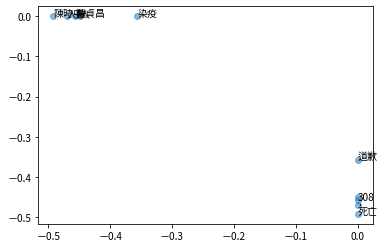

In [39]:
import matplotlib.pyplot as plt
# 選擇字體
# plt.rcParams["font.sans-serif"] = ["SimHei"]
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)
plt.show()